# DATA PROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import dask.dataframe as dd
from dask.distributed import Client, progress
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
trips = pd.read_csv("Trips_by_Distance.csv")
trips_full = pd.read_csv("Trips_Full Data.csv")

In [4]:
trips.head()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,1/1/2019,NaN,NaN,NaN,NaN,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,1/2/2019,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,1/3/2019,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,1/4/2019,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1.181954e+09,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,1/5/2019,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1.180477e+09,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1


In [5]:
trips_full.head()

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,Week 32,2019,National,8/4/2019 0:00,10-Aug-19,292959749,258404133,67763287,1322685497,934957837,346577279,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,Week 32,2019,National,8/5/2019 0:00,10-Aug-19,317133861,262199758,63967662,1412564488,996863262,358008909,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,Week 32,2019,National,8/6/2019 0:00,10-Aug-19,324443205,260096133,66071287,1437762102,1014614495,366533991,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,Week 32,2019,National,8/7/2019 0:00,10-Aug-19,358483024,258878802,67288618,1543710309,1084498325,401474049,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,Week 32,2019,National,8/8/2019 0:00,10-Aug-19,300765870,262410045,63757375,1382044815,984193010,347857770,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


# DATA PROCESSING - DASK

In [6]:
# client = Client(n_workers=10)

# trips = dd.read_csv("Trips_by_Distance.csv")
# trips_full = dd.read_csv("Trips_Full Data.csv")

# X = ddf_full[['Trips 1-25 Miles']].compute()
# y = ddf_distance['Number of Trips 10-25'].compute()

# X = X.dropna()
# y = y.dropna()


# DATA CLEANING - Trips

In [7]:
trips.tail()

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
1048570,County,11/1/2019,19.0,IA,19185.0,Wayne County,1360.0,5081.0,28297.0,5784.0,2509.0,152.0,4114.0,7260.0,5522.0,2398.0,530.0,25.0,3.0,19-19185-20191101,43,11
1048571,County,11/1/2019,19.0,IA,19187.0,Webster County,7633.0,28271.0,166016.0,32150.0,53230.0,30574.0,6450.0,30274.0,6826.0,5116.0,1058.0,243.0,95.0,19-19187-20191101,43,11
1048572,County,11/1/2019,19.0,IA,19189.0,Winnebago County,2377.0,7977.0,40352.0,9789.0,7624.0,1480.0,6670.0,8829.0,4652.0,1101.0,115.0,52.0,40.0,19-19189-20191101,43,11
1048573,County,11/1/2019,19.0,IA,19191.0,Winneshiek County,3972.0,16019.0,78526.0,16644.0,11304.0,7741.0,12374.0,19696.0,6665.0,3832.0,216.0,54.0,0.0,19-19191-20191101,43,11
1048574,County,11/1/2019,19.0,IA,19193.0,Woodbury County,19419.0,83688.0,541096.0,164342.0,144769.0,77008.0,73881.0,53044.0,16927.0,7606.0,3319.0,123.0,77.0,19-19193-20191101,43,11


In [8]:
print(trips.shape)
trips.dtypes

(1048575, 22)


Level                              object
Date                               object
State FIPS                        float64
State Postal Code                  object
County FIPS                       float64
County Name                        object
Population Staying at Home        float64
Population Not Staying at Home    float64
Number of Trips                   float64
Number of Trips <1                float64
Number of Trips 1-3               float64
Number of Trips 3-5               float64
Number of Trips 5-10              float64
Number of Trips 10-25             float64
Number of Trips 25-50             float64
Number of Trips 50-100            float64
Number of Trips 100-250           float64
Number of Trips 250-500           float64
Number of Trips >=500             float64
Row ID                             object
Week                                int64
Month                               int64
dtype: object

In [9]:
print(trips.isnull().sum())

Level                                 0
Date                                  0
State FIPS                          901
State Postal Code                   901
County FIPS                       46852
County Name                       46852
Population Staying at Home        12950
Population Not Staying at Home    12950
Number of Trips                   12950
Number of Trips <1                12950
Number of Trips 1-3               12950
Number of Trips 3-5               12950
Number of Trips 5-10              12950
Number of Trips 10-25             12950
Number of Trips 25-50             12950
Number of Trips 50-100            12950
Number of Trips 100-250           12950
Number of Trips 250-500           12950
Number of Trips >=500             12950
Row ID                                0
Week                                  0
Month                                 0
dtype: int64


In [10]:
trips.drop(columns=['State FIPS', 'State Postal Code', 'County FIPS', 'County Name'], inplace = True)

In [11]:
trips[trips.isna().any(axis=1)].tail()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
1048397,County,11/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53-53069-20191112,45,11
1048460,County,11/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02282-20191112,45,11
1048492,County,11/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02-02290-20191112,45,11
1048515,County,11/3/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-30055-20191103,44,11
1048525,County,11/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-06003-20191112,45,11


In [12]:
subset=['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
        'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
        'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
        'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']

for col in subset:
    trips[col] = trips[col].fillna(trips[col].mean())

In [13]:
# trips = trips.dropna(subset=['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
#                     'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
#                     'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
#                     'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500'])

In [14]:
trips = trips.drop_duplicates()

In [15]:
# trips.fillna(trips.mean(), inplace=True)

In [16]:
print(trips.isnull().sum())

Level                             0
Date                              0
Population Staying at Home        0
Population Not Staying at Home    0
Number of Trips                   0
Number of Trips <1                0
Number of Trips 1-3               0
Number of Trips 3-5               0
Number of Trips 5-10              0
Number of Trips 10-25             0
Number of Trips 25-50             0
Number of Trips 50-100            0
Number of Trips 100-250           0
Number of Trips 250-500           0
Number of Trips >=500             0
Row ID                            0
Week                              0
Month                             0
dtype: int64


In [17]:
trips['Date'] = pd.to_datetime(trips['Date'])
# trips.set_index('Date', inplace=True)
# trips.sort_index(inplace=True)

In [18]:
trips_col = [
    'Population Staying at Home',
    'Population Not Staying at Home',
    'Number of Trips',
    'Number of Trips <1',
    'Number of Trips 1-3',
    'Number of Trips 3-5',
    'Number of Trips 5-10',
    'Number of Trips 10-25',
    'Number of Trips 25-50',
    'Number of Trips 50-100',
    'Number of Trips 100-250',
    'Number of Trips 250-500',
    'Number of Trips >=500'
]

trips[trips_col] = trips[trips_col].astype('int64')

In [19]:
#independant and dependant variables

trips_32 = trips[(trips['Week'] == 32) & (trips['Date'].dt.year == 2019)]

x = trips_full['Trips 25-100 Miles'] 
y = trips_32['Number of Trips 10-25']

## Trips - categorization

In [20]:
trips['Level'].unique()


array(['National', 'State', 'County'], dtype=object)

In [21]:
trips = trips[(trips['Level'] == "National")]
trips_s = trips[(trips['Level'] == "State")]
trips_c = trips[(trips['Level'] == "County")]

In [22]:
# trips[trips['Date'].dt.year == 2019].head()

# DATA CLEANING - TRIPS_FULL

In [23]:
trips_full.dtypes

Month of Date                 object
Week of Date                  object
Year of Date                   int64
Level                         object
Date                          object
Week Ending Date              object
Trips <1 Mile                  int64
People Not Staying at Home     int64
Population Staying at Home     int64
Trips                          int64
Trips 1-25 Miles               int64
Trips 1-3 Miles                int64
Trips 10-25 Miles              int64
Trips 100-250 Miles            int64
Trips 100+ Miles               int64
Trips 25-100 Miles             int64
Trips 25-50 Miles              int64
Trips 250-500 Miles            int64
Trips 3-5 Miles                int64
Trips 5-10 Miles               int64
Trips 50-100 Miles             int64
Trips 500+ Miles               int64
dtype: object

In [24]:
# May not need these columns
# trips_full = trips_full.drop(columns=['Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 1-25 Miles'])

In [25]:
trips_full['Week of Date'] = 32

In [26]:
trips_full['Date'] = pd.to_datetime(trips_full['Date'])

# How many people are staying at home?

In [27]:
#trips seperated by year

# trips_19 = trips[trips['Date'].dt.year == 2019].groupby('Week')['Population Staying at Home'].mean()
# trips_20 = trips[trips['Date'].dt.year == 2020].groupby('Week')['Population Staying at Home'].mean()
# trips_21 = trips[trips['Date'].dt.year == 2021].groupby('Week')['Population Staying at Home'].mean()
# trips_22 = trips[trips['Date'].dt.year == 2022].groupby('Week')['Population Staying at Home'].mean()

# plt.figure(figsize=(12, 6)) 
# plt.bar(trips_19.index, trips_19.values, color='skyblue')
# plt.xlabel('Week')
# plt.ylabel('Population Staying at Home')
# plt.title('Mean National Population Staying at Home by Week')
# plt.xticks(trips_national.index)  
# plt.tight_layout()
# plt.show()

In [28]:
trips_mean = trips.groupby(by='Week')['Population Staying at Home'].mean()

In [29]:
trips_mean

Week
0     7.384405e+07
1     7.222715e+07
2     7.144295e+07
3     6.998493e+07
4     6.982941e+07
5     6.910108e+07
6     6.852736e+07
7     7.001310e+07
8     6.587532e+07
9     6.563279e+07
10    6.598210e+07
11    7.366140e+07
12    7.478372e+07
13    7.577730e+07
14    7.568128e+07
15    7.616011e+07
16    7.425262e+07
17    7.430106e+07
18    7.402338e+07
19    7.113875e+07
20    6.735490e+07
21    7.148468e+07
22    7.073767e+07
23    7.030620e+07
24    7.118134e+07
25    6.993038e+07
26    7.264797e+07
27    7.115585e+07
28    7.149897e+07
29    7.425933e+07
30    7.335349e+07
31    7.199460e+07
32    6.848695e+07
33    6.834164e+07
34    7.134600e+07
35    7.371997e+07
36    7.447109e+07
37    7.402661e+07
38    7.317520e+07
39    7.379786e+07
40    7.488744e+07
41    7.417908e+07
42    7.444592e+07
43    7.545111e+07
44    7.847537e+07
45    8.025509e+07
46    8.030774e+07
47    8.110965e+07
48    7.824118e+07
49    7.909777e+07
50    7.997042e+07
51    8.488364e+07
52    8

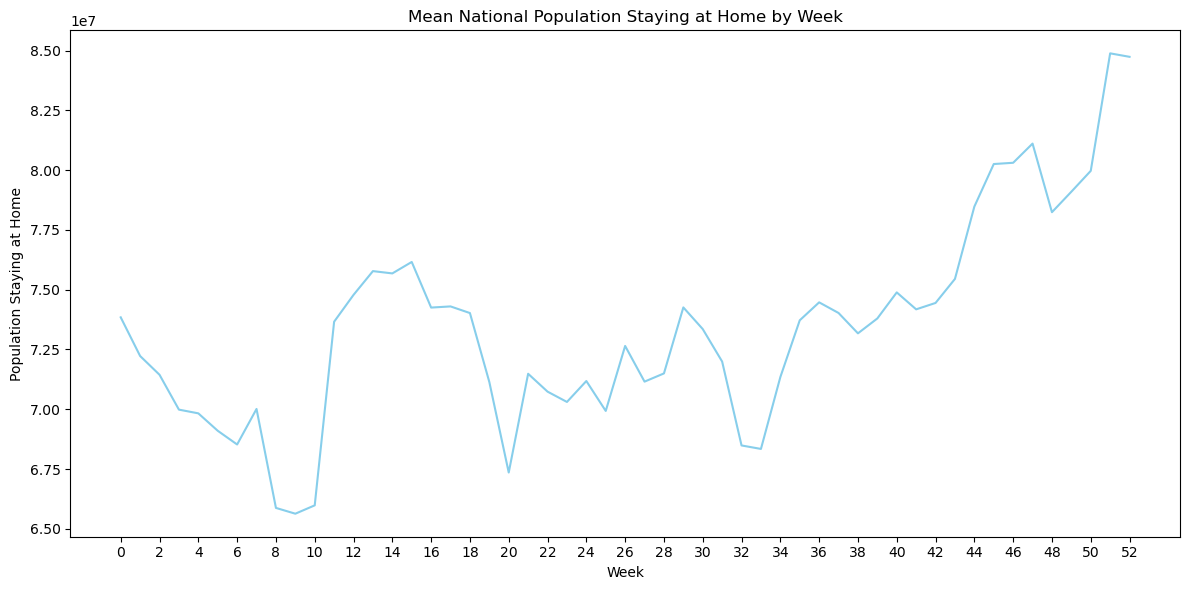

In [30]:
trips_mean = trips.groupby(by='Week')['Population Staying at Home'].mean()

plt.figure(figsize=(12, 6)) 
# plt.bar(trips_mean.index, trips_mean.values, color='skyblue', width = 0.4)
plt.plot(trips_mean.index, trips_mean.values, color='skyblue')
plt.xlabel('Week')
plt.ylabel('Population Staying at Home')
plt.title('Mean National Population Staying at Home by Week')
plt.xticks(trips_mean.index[::2])  
# plt.xticks(range(ttrips_meanri['Week'].nunique()+1))
plt.tight_layout()
plt.show()

# How far are people traveling when they don’t stay home?

In [31]:
trips_full

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,32,2019,National,2019-08-04,10-Aug-19,292959749,258404133,67763287,1322685497,934957837,346577279,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,32,2019,National,2019-08-05,10-Aug-19,317133861,262199758,63967662,1412564488,996863262,358008909,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,32,2019,National,2019-08-06,10-Aug-19,324443205,260096133,66071287,1437762102,1014614495,366533991,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,32,2019,National,2019-08-07,10-Aug-19,358483024,258878802,67288618,1543710309,1084498325,401474049,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,32,2019,National,2019-08-08,10-Aug-19,300765870,262410045,63757375,1382044815,984193010,347857770,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725
5,August,32,2019,National,2019-08-09,10-Aug-19,341515854,272101417,54066003,1501571863,1052793819,378936486,245571995,7635743,12256537,95005653,74512584,1823661,186257669,242027669,20493069,2797133
6,August,32,2019,National,2019-08-10,10-Aug-19,346532975,267638064,58529356,1491503216,1040967509,386948113,230580285,7550100,12173176,91829556,70644329,1794030,186580557,236858554,21185227,2829046


In [92]:
trips_full_col = [
    'Trips 1-3 Miles', 
    'Trips 3-5 Miles', 
    'Trips 5-10 Miles', 
    'Trips 10-25 Miles', 
    'Trips 25-50 Miles', 
    'Trips 50-100 Miles', 
    'Trips 100-250 Miles', 
    'Trips 250-500 Miles', 
    'Trips 500+ Miles'
]

trips_full_mean = trips_full[trips_full_col].mean()

In [93]:
trips_full_mean

Trips 1-3 Miles        3.694767e+08
Trips 3-5 Miles        1.815558e+08
Trips 5-10 Miles       2.334445e+08
Trips 10-25 Miles      2.310785e+08
Trips 25-50 Miles      6.915913e+07
Trips 50-100 Miles     1.887832e+07
Trips 100-250 Miles    6.850130e+06
Trips 250-500 Miles    1.829242e+06
Trips 500+ Miles       3.443101e+06
dtype: float64

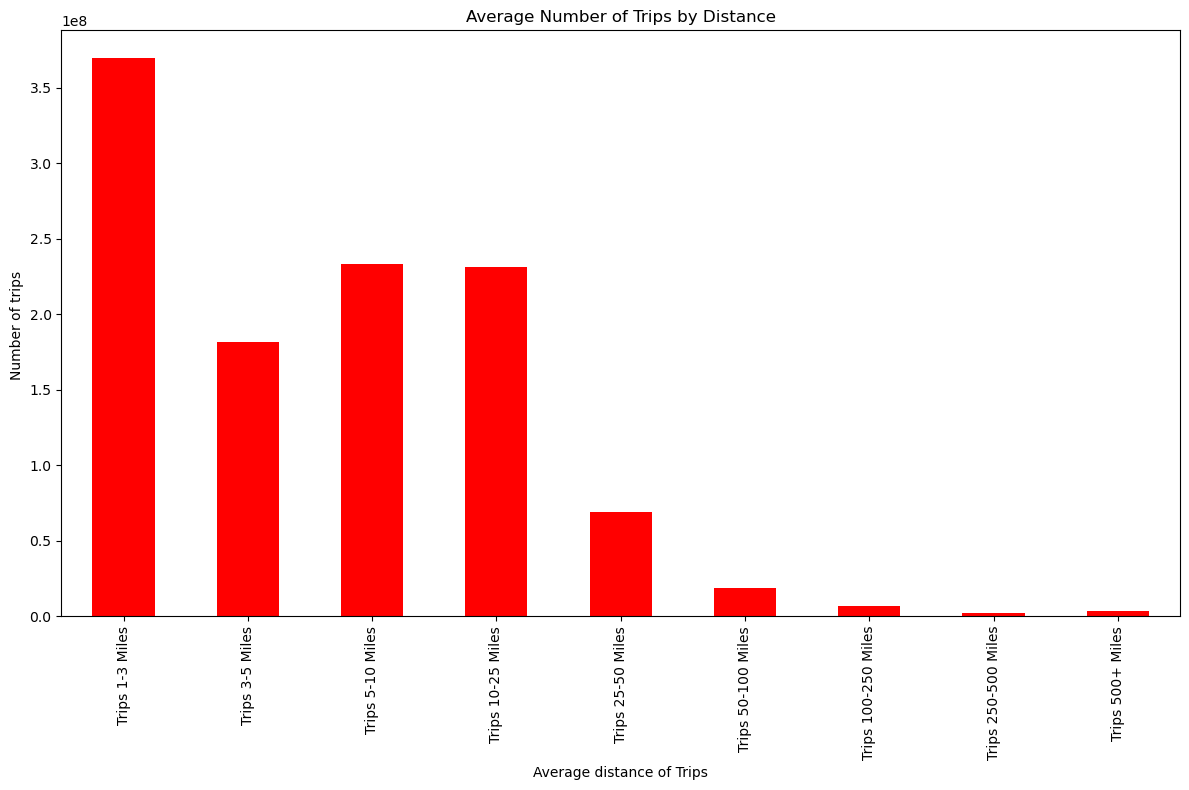

In [94]:
plt.figure(figsize=(12, 8))
trips_full_mean.plot(kind = "bar",color = "red")
plt.title('Average Number of Trips by Distance')
plt.xlabel('Average distance of Trips')
plt.ylabel('Number of trips ')
plt.tight_layout()
plt.show()

# Question 2

In [32]:
trips_1025 = trips[(trips['Number of Trips 10-25'] > 10000000)]
trips_50100 = trips[(trips['Number of Trips 50-100'] > 10000000)]

In [33]:
trips_1025.head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019-01-01,77433867,248733553,897784368,241667151,234284795,108078903,129670778,116904343,40432062,15686639,7525563,1806022,1728112,00-00000-20190101,0,1
1,National,2019-01-02,61305201,264862219,1139452281,291276735,285887315,138039296,171637514,167412698,56148976,17739183,7817044,1962301,1531219,00-00000-20190102,0,1
2,National,2019-01-03,63050480,263116940,1162752684,296375014,290074425,140771581,175775410,172027487,57632422,18366626,8124548,2038099,1567072,00-00000-20190103,0,1
3,National,2019-01-04,61803652,264363768,1181953829,293159631,295643296,145251819,181324645,176144493,58761592,19315785,8687318,2096065,1569185,00-00000-20190104,0,1
4,National,2019-01-05,64389745,261777675,1180476620,295459014,304168709,148540651,180941769,165239790,54842134,19363939,8490791,1991159,1438664,00-00000-20190105,0,1


In [98]:
print("Number of rows in trips_1025:", len(trips_1025))
print("Number of rows in trips_50100:", len(trips_50100))

Number of rows in trips_1025: 901
Number of rows in trips_50100: 900


In [99]:
print(f"trips_1025 mean = {trips_1025['Number of Trips 10-25'].mean()}")
print(f"trips_50100 mean = {trips_50100['Number of Trips 50-100'].mean()}")

trips_1025 mean = 179005342.2219756
trips_50100 mean = 18987616.51


In [100]:
trips_1025['Number of Trips 10-25'].describe()

count    9.010000e+02
mean     1.790053e+08
std      3.818685e+07
min      8.037180e+07
25%      1.476391e+08
50%      1.764698e+08
75%      2.149731e+08
max      2.565096e+08
Name: Number of Trips 10-25, dtype: float64

In [101]:
trips_50100['Number of Trips 50-100'].describe()

count    9.000000e+02
mean     1.898762e+07
std      2.516134e+06
min      1.058912e+07
25%      1.749305e+07
50%      1.897076e+07
75%      2.070144e+07
max      2.873561e+07
Name: Number of Trips 50-100, dtype: float64

In [102]:
trips_1025.head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019-01-01,77433867,248733553,897784368,241667151,234284795,108078903,129670778,116904343,40432062,15686639,7525563,1806022,1728112,00-00000-20190101,0,1
1,National,2019-01-02,61305201,264862219,1139452281,291276735,285887315,138039296,171637514,167412698,56148976,17739183,7817044,1962301,1531219,00-00000-20190102,0,1
2,National,2019-01-03,63050480,263116940,1162752684,296375014,290074425,140771581,175775410,172027487,57632422,18366626,8124548,2038099,1567072,00-00000-20190103,0,1
3,National,2019-01-04,61803652,264363768,1181953829,293159631,295643296,145251819,181324645,176144493,58761592,19315785,8687318,2096065,1569185,00-00000-20190104,0,1
4,National,2019-01-05,64389745,261777675,1180476620,295459014,304168709,148540651,180941769,165239790,54842134,19363939,8490791,1991159,1438664,00-00000-20190105,0,1


In [103]:
trips_50100.head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019-01-01,77433867,248733553,897784368,241667151,234284795,108078903,129670778,116904343,40432062,15686639,7525563,1806022,1728112,00-00000-20190101,0,1
1,National,2019-01-02,61305201,264862219,1139452281,291276735,285887315,138039296,171637514,167412698,56148976,17739183,7817044,1962301,1531219,00-00000-20190102,0,1
2,National,2019-01-03,63050480,263116940,1162752684,296375014,290074425,140771581,175775410,172027487,57632422,18366626,8124548,2038099,1567072,00-00000-20190103,0,1
3,National,2019-01-04,61803652,264363768,1181953829,293159631,295643296,145251819,181324645,176144493,58761592,19315785,8687318,2096065,1569185,00-00000-20190104,0,1
4,National,2019-01-05,64389745,261777675,1180476620,295459014,304168709,148540651,180941769,165239790,54842134,19363939,8490791,1991159,1438664,00-00000-20190105,0,1


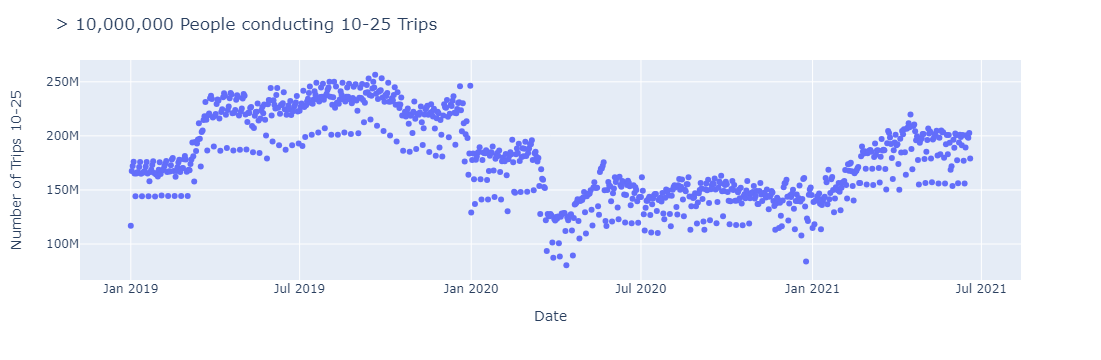

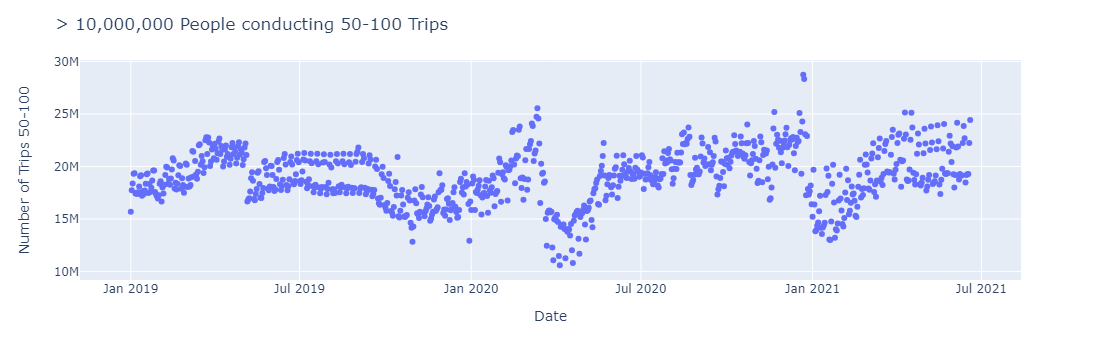

In [104]:
fig = px.scatter(x= trips_1025['Date'], y= trips_1025['Number of Trips 10-25'])
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Trips 10-25',
    title= '> 10,000,000 People conducting 10-25 Trips'
)
fig.show()

fig = px.scatter(x= trips_50100['Date'], y= trips_50100['Number of Trips 50-100'])
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Trips 50-100',
    title= '> 10,000,000 People conducting 50-100 Trips'
)
fig.show()

# Parallel Processing

## Question 1 - dask

In [ ]:
for i in [20,20,20]:
    n_processors = [10, 20]
    n_processors_time = {}
    
    for processor in n_processors:
        print(f"\n\n\nStarting computation with {processor} processors...\n\n\n")
        client = Client(n_workers = processor)
        start = time.time()
    
    
    
        null_col = ['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
         'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
         'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
         'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']
        
        trips_dtype = {
            'Number of Trips': 'float64',
            'Number of Trips <1': 'float64',
            'Number of Trips 1-3': 'float64',
            'Number of Trips 3-5': 'float64',
            'Number of Trips 5-10': 'float64',
            'Number of Trips 10-25': 'float64',
            'Number of Trips 25-50': 'float64',
            'Number of Trips 50-100': 'float64',
            'Number of Trips 100-250': 'float64',
            'Number of Trips 250-500': 'float64',
            'Number of Trips >=500': 'float64',
            'State FIPS': 'object',
            'State Postal Code': 'object',
            'County FIPS': 'object',
            'County Name': 'object',
            'Population Staying at Home': 'float64',
            'Population Not Staying at Home': 'float64'
        }
        
        trips = dd.read_csv("Trips_by_Distance.csv", dtype=trips_dtype, blocksize=25e6)
        trips = trips.repartition(npartitions=i)
        
        trips['Date'] = dd.to_datetime(trips['Date'])
        trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
        trips = trips.dropna(subset=null_col)
        trips = trips[(trips['Level'] == "National")]
        trips_mean = trips.groupby('Week')['Population Staying at Home'].mean().compute()
        
        plt.figure(figsize=(12, 6)) 
        plt.bar(trips_mean.index, trips_mean.values, color='skyblue', width = 0.4)
        plt.xlabel('Week')
        plt.ylabel('Population Staying at Home')
        plt.title('Mean National Population Staying at Home by Week')
        plt.xticks(trips_mean.index)  
        plt.tight_layout()
        plt.show()
    
    
    
        
        dask_time = time.time() - start
        n_processors_time[processor] = dask_time
    
        print(f"\n\n\nTime with {processor} processors: {dask_time} seconds\n\n\n")
        print(f"npartition = {i}")
        # Close the client after computation
        client.close()
    print("\n\n\n", n_processors_time, "\n\n\n")

## Question 1 - pandas

In [ ]:

start = time.time()

null_col = ['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']

trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

trips = pd.read_csv("Trips_by_Distance.csv")
trips['Date'] = pd.to_datetime(trips['Date'])
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
trips = trips.dropna(subset=null_col)
trips = trips[(trips['Level'] == "National")]
national_mean_pop = trips.groupby('Week')['Population Staying at Home'].mean()

national_mean_pop.plot(kind='bar', color='skyblue')
plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.tick_params(axis='x', rotation=90)
plt.show()





    
final_time = time.time() - start
print(f"time = {final_time}")

## Question 2 - dask

In [ ]:
for i in [10,10,10]:
    n_processors = [10, 20]
    n_processors_time = {}
    
    for processor in n_processors:
        print(f"\n\n\nStarting computation with {processor} processors...\n\n\n")
        client = Client(n_workers = processor)
        start = time.time()
    
    
    
        null_col = ['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
         'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
         'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
         'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']
        
        trips_dtype = {
            'Number of Trips': 'float64',
            'Number of Trips <1': 'float64',
            'Number of Trips 1-3': 'float64',
            'Number of Trips 3-5': 'float64',
            'Number of Trips 5-10': 'float64',
            'Number of Trips 10-25': 'float64',
            'Number of Trips 25-50': 'float64',
            'Number of Trips 50-100': 'float64',
            'Number of Trips 100-250': 'float64',
            'Number of Trips 250-500': 'float64',
            'Number of Trips >=500': 'float64',
            'State FIPS': 'object',
            'State Postal Code': 'object',
            'County FIPS': 'object',
            'County Name': 'object',
            'Population Staying at Home': 'float64',
            'Population Not Staying at Home': 'float64'
        }
        
        trips = dd.read_csv("Trips_by_Distance.csv", dtype=trips_dtype)
        trips = trips.repartition(npartitions=i)
        
        trips['Date'] = dd.to_datetime(trips['Date'])
        trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
        trips = trips.dropna(subset=null_col)
        trips = trips[(trips['Level'] == "National")]
        trips_1025 = trips[(trips['Number of Trips 10-25'] > 10000000)].compute()
        trips_50100 = trips[(trips['Number of Trips 50-100'] > 10000000)].compute()
        
        fig = px.scatter(x= trips_1025['Date'], y= trips_1025['Number of Trips 10-25'])
        fig.update_layout(
            xaxis_title='Date',
            yaxis_title='Number of Trips 10-25'
        )
        fig.show()
        
        fig = px.scatter(x= trips_50100['Date'], y= trips_50100['Number of Trips 50-100'])
        fig.update_layout(
            xaxis_title='Date',
            yaxis_title='Number of Trips 50-100'
        )
        fig.show()
    
        dask_time = time.time() - start
        n_processors_time[processor] = dask_time
        
        print(f"\n\n\nTime with {processor} processors: {dask_time} seconds\n\n\n")
        # Close the client after computation
        client.close()
    print("\n\n\n", n_processors_time, "\n\n\n", "npartitions = ", i)

## Question 2 pandas

In [ ]:
start = time.time()

null_col = ['Population Staying at Home', 'Population Not Staying at Home', 'Number of Trips',
 'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5', 'Number of Trips 5-10',
 'Number of Trips 10-25', 'Number of Trips 25-50', 'Number of Trips 50-100',
 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']

trips = pd.read_csv("Trips_by_Distance.csv")

trips['Date'] = dd.to_datetime(trips['Date'])
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
trips = trips.dropna(subset=null_col)
trips = trips[(trips['Level'] == "National")]
trips_1025 = trips[(trips['Number of Trips 10-25'] > 10000000)]
trips_50100 = trips[(trips['Number of Trips 50-100'] > 10000000)]

fig = px.scatter(x= trips_1025['Date'], y= trips_1025['Number of Trips 10-25'])
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Trips 10-25'
)
fig.show()

fig = px.scatter(x= trips_50100['Date'], y= trips_50100['Number of Trips 50-100'])
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Trips 50-100'
)
fig.show()

final_time = time.time() - start

print(f"time = {final_time}")

# Advanced linear regression

In [34]:
trips_32.head()

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
222,National,2019-08-11,63187701,262979719,1330499464,299026215,352862549,169212794,213249600,201005594,60614887,20293239,8630123,2115924,3488539,00-00000-20190811,32,8
223,National,2019-08-12,61167304,265000116,1411657428,319209368,358502901,176415689,228884645,229606894,69124341,18115873,6496047,1805586,3496084,00-00000-20190812,32,8
224,National,2019-08-13,61316198,264851222,1430706882,324117836,365353430,177765084,231439269,233699240,69879822,17543116,5959281,1693212,3256592,00-00000-20190813,32,8
225,National,2019-08-14,59587648,266579772,1479220061,338597223,378771975,182823960,237225197,241348261,72229318,17999938,5936503,1565689,2721997,00-00000-20190814,32,8
226,National,2019-08-15,61373133,264794287,1452687014,326694872,366603887,183081700,237319382,237958630,71018038,18250669,6367638,1796746,3595452,00-00000-20190815,32,8


In [35]:
trips_full.head()

,Month of Date,Week of Date,Year of Date,Level,Date,Week Ending Date,Trips <1 Mile,People Not Staying at Home,Population Staying at Home,Trips,Trips 1-25 Miles,Trips 1-3 Miles,Trips 10-25 Miles,Trips 100-250 Miles,Trips 100+ Miles,Trips 25-100 Miles,Trips 25-50 Miles,Trips 250-500 Miles,Trips 3-5 Miles,Trips 5-10 Miles,Trips 50-100 Miles,Trips 500+ Miles
0,August,32,2019,National,2019-08-04,10-Aug-19,292959749,258404133,67763287,1322685497,934957837,346577279,200922270,8595827,15338786,79429125,59517188,2273613,171336406,216121882,19911937,4469346
1,August,32,2019,National,2019-08-05,10-Aug-19,317133861,262199758,63967662,1412564488,996863262,358008909,228809869,6535920,12563068,86004297,68184743,1941260,178996059,231048425,17819554,4085888
2,August,32,2019,National,2019-08-06,10-Aug-19,324443205,260096133,66071287,1437762102,1014614495,366533991,235621127,5993704,11104823,87599579,70149166,1741994,179210645,233248732,17450413,3369125
3,August,32,2019,National,2019-08-07,10-Aug-19,358483024,258878802,67288618,1543710309,1084498325,401474049,249988663,5379881,8528574,92200386,74381367,1272248,189163336,243872277,17819019,1876445
4,August,32,2019,National,2019-08-08,10-Aug-19,300765870,262410045,63757375,1382044815,984193010,347857770,226055368,6259735,12892348,84193587,66724543,1957888,179346163,230933709,17469044,4674725


In [36]:
trips_32 = trips[(trips['Level'] == "National") & (trips['Week'] == 32) & (trips['Date'].dt.year == 2019)]

x = trips_full['Trips 10-25 Miles'] 
y = trips_32['Number of Trips 10-25']

x, y = np.array(x), np.array(y)
x = sm.add_constant(x)

#creating the model
model = sm.OLS(y, x)
results = model.fit()

print(results.summary())
print(f"coefficient of determination: {results.rsquared}")
print(f"adjusted coefficient of determination: {results.rsquared_adj}")
print(f"regression coefficients: {results.params}")
print(f"predicted response:\n{results.fittedvalues}")
print(f"predicted response:\n{results.predict(x)}")

#changed to a 1 instead of 2
x_new = sm.add_constant(np.arange(10).reshape((-1, 1)))
y_new = results.predict(x_new)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     28.13
Date:                Tue, 02 Jul 2024   Prob (F-statistic):            0.00318
Time:                        16:09:42   Log-Likelihood:                -118.53
No. Observations:                   7   AIC:                             241.1
Df Residuals:                       5   BIC:                             241.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.957e+07   3.83e+07      0.772      0.4

C:\Users\mkb25\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


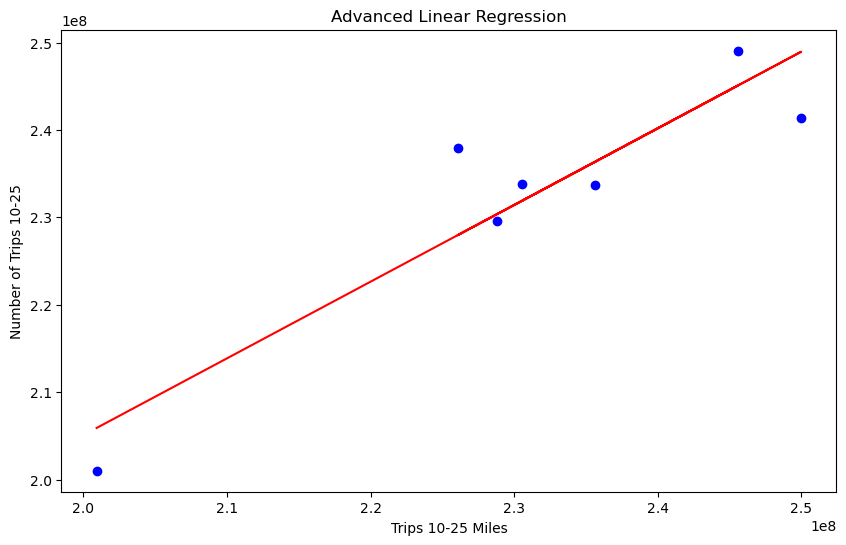

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 1], y, color='blue', label='Actual Data')
plt.plot(x[:, 1], results.fittedvalues, color='red')
plt.xlabel('Trips 10-25 Miles')
plt.ylabel('Number of Trips 10-25')
plt.title('Advanced Linear Regression')
plt.show()

In [38]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

model = sm.OLS(y_train, X_train)
results = model.fit()

test_model = sm.OLS(y_test, X_test)
test_results = test_model.fit()

predictions = results.predict(X_test)

r_sq_train = results.rsquared
r_sq_test = test_results.rsquared

print(f"R-squared (train): {r_sq_train}")
print(f"R-squared (test): {r_sq_test}")
print(f"mse: {mean_squared_error(y_test, predictions)}")

R-squared (train): 0.4308023161523008
R-squared (test): 1.0


NameError: name 'mean_squared_error' is not defined

# Linear regression

In [ ]:
trips_32 = trips[(trips['Level'] == "National") & (trips['Week'] == 32) & (trips['Date'].dt.year == 2019)]

x = trips_full['Trips 10-25 Miles'] 
y = trips_32['Number of Trips 10-25']

x=np.array(x).reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)

print(r_sq)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
print(model.score)

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("Trips 10-25 Miles")
plt.ylabel("Number of Trips 10-25")
plt.title("Linear Regression")

In [ ]:
#model testing
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions

r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)

print(f"R-squared (train): {r_sq_train}")
print(f"R-squared (test): {r_sq_test}")

# Ponynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

trips_32 = trips[(trips['Level'] == "National") & (trips['Week'] == 32) & (trips['Date'].dt.year == 2019)]

x = trips_full['Trips 10-25 Miles'] 
y = trips_32['Number of Trips 10-25']

x, y = np.array(x), np.array(y)
x=np.array(x).reshape((-1, 1))

x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

model=LinearRegression().fit(x_,y)

r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

y_pred = model.predict(x_)

print(r_sq)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

mean_squared_error(x, y)

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred)
plt.xlabel("Trips 10-25 Miles")
plt.ylabel("Number of Trips 10-25")
plt.title("Polynomial Regression")

In [ ]:
#model testing

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions

r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)

print(r_sq_train,r_sq_test)

mean_squared_error(y_test, predictions)

# Multiple linear regression

In [ ]:
trips_32 = trips[(trips['Level'] == "National") & (trips['Week'] == 32) & (trips['Date'].dt.year == 2019)]

x = trips_full[['Trips 1-25 Miles','Trips 10-25 Miles'] ]
y = trips_32['Number of Trips 10-25']

x, y = np.array(x), np.array(y)
# x=np.array(x).reshape((-1, 1))

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)

print(r_sq)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")


In [ ]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0], y_pred, color='red',)
plt.xlabel("Trips 1-25 Miles")

In [ ]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1], y_pred, color='red',)
plt.xlabel("Trips 10-25 Miles")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
predictions

r_sq_train = model.score(X_train, y_train)
r_sq_test = model.score(X_test, y_test)

print(f"R-squared (train): {r_sq_train}")
print(f"R-squared (test): {r_sq_test}")